Nama : Indri Windriasari <br>
Email: indriwindriasari2511@gmail.com

# Machine Learning Terapan - Submission Predictive Analytics <br>
## **Judul Proyek : Mengatasi Tantangan Attrition Karyawan dengan Prediksi Berbasis Machine Learning**

Proyek ini bertujuan untuk memahami dan mengatasi tantangan atrisi karyawan melalui pendekatan berbasis machine learning.

Dengan menggunakan dataset kuantitatif HR IBM Analytics yang mencakup 1.470 entri karyawan dan 35 fitur, proyek ini mengembangkan model prediktif berbasis klasifikasi biner untuk mengelompokkan karyawan ke dalam dua kategori: **Bertahan** dan **Keluar**. Tiga algoritma machine learning: *XGBoost, Random Forest, dan Logistic Regression* digunakan untuk menggali pola-pola dalam data.

Hasil dari model ini diharapkan dapat membantu menurunkan biaya rekrutmen, eningkatkan tingkat retensi karyawan, serta memberikan wawasan strategis bagi pengelolaan sumber daya manusia.

## 1. Library Import

In [73]:
import datetime
from statistics import stdev
from tqdm import tqdm

# Mengimpor pustaka untuk manipulasi data dan EDA (Exploratory Data Analysis)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Mengimpor pustaka untuk preprocessing data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import imblearn

# Mengimpor pustaka untuk membangun dan melatih model machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Mengimpor pustaka untuk seleksi fitur dan tuning hyperparameter
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import (GridSearchCV, RepeatedStratifiedKFold,
                                     cross_val_score, train_test_split)

# Mengimpor pustaka untuk evaluasi model
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, precision_recall_curve,
                             roc_auc_score, roc_curve)

# Menonaktifkan peringatan yang tidak diperlukan selama eksekusi
import warnings
warnings.filterwarnings('ignore')

## 2. Data Understanding

### 2.1 Data Loading

Tahapan ini memuat dataset [HR IBM Analytics](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data) dan menampilkan informasi awal dari dataset

#### 2.1.1 Download Dataset

In [74]:
# Membuat direktori baru bernama kaggle
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke direktori kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

# Ekstrak berkas zip
!unzip /content/ibm-hr-analytics-attrition-dataset.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 64.6MB/s]
Archive:  /content/ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


#### 2.1.2 Read Dataset

In [75]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 2.1.3 Dimensi Dataset

In [76]:
df.shape

(1470, 35)

Dataset terdiri dari 1.470 entri data dengan 35 fitur

### 2.2 Exploratory Data Analysis (EDA)

EDA adalah tahap awal dalam analisis data yang bertujuan untuk memahami karakteristik dataset.
mengidentifikasi pola atau hubungan antar fitur, mendeteksi anomali, seperti nilai yang hilang (missing values) atau outlier, dan memvalidasi asumsi sebelum melanjutkan ke tahapan analisis atau pemodelan.

Teknik ini biasanya memanfaatkan metode statistik deskriptif dan visualisasi data untuk memberikan wawasan.

In [77]:
df.info() # menampilkan informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [78]:
df.describe() # menampilkan deskripsi statistik data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [79]:
def explore(df):
  """
    Fungsi ini digunakan untuk melakukan eksplorasi awal pada dataset yang diberikan dan memberikan informasi penting tentang setiap kolom dalam DataFrame, seperti:
      - Tipe data setiap kolom.
      - Persentase nilai yang hilang di setiap kolom.
      - Jumlah nilai unik yang ada di setiap kolom.
      - Daftar nilai unik dari setiap kolom.
  """
  with pd.option_context("display.max_colwidth", 20):
    info = pd.DataFrame()
    info['data type'] = df.dtypes
    info['percentage missing'] = df.isnull().sum()*100/len(df)
    info['number of unique'] = df.apply(lambda x: len(x.unique()))
    info['unique values'] = df.apply(lambda x: x.unique())
  return info.sort_values('data type')

In [80]:
explore(df)

,data type,percentage missing,number of unique,unique values
Age,int64,0.0,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
YearsInCurrentRole,int64,0.0,19,"[4, 7, 0, 2, 5, 9, 8, 3, 6, 13, 1, 15, 14, 16,..."
YearsAtCompany,int64,0.0,37,"[6, 10, 0, 8, 2, 7, 1, 9, 5, 4, 25, 3, 12, 14,..."
WorkLifeBalance,int64,0.0,4,"[1, 3, 2, 4]"
TrainingTimesLastYear,int64,0.0,7,"[0, 3, 2, 5, 1, 4, 6]"
TotalWorkingYears,int64,0.0,40,"[8, 10, 7, 6, 12, 1, 17, 5, 3, 31, 13, 0, 26, ..."
StockOptionLevel,int64,0.0,4,"[0, 1, 3, 2]"
StandardHours,int64,0.0,1,[80]
RelationshipSatisfaction,int64,0.0,4,"[1, 4, 2, 3]"
PerformanceRating,int64,0.0,2,"[3, 4]"


Dataset tidak memiliki missing value

<center> <h2>Visualisasi Distribusi Persentase Attrition</h2> </center>

Distribusi persentase untuk variabel target 'Attrition':
- 'Yes' menunjukkan karyawan yang keluar.
- 'No' menunjukkan karyawan yang tetap bertahan.

In [81]:
attrition_distribution = df['Attrition'].value_counts(normalize=True) * 100

# pie chart
fig = px.pie(values=attrition_distribution, names=attrition_distribution.index,
             title='<b>Attrition Distribution</b>',
             labels={'names': 'Attrition Status', 'values': 'Percentage'}, height=400,
             color_discrete_sequence=['#D4AF37', '#990000'])

fig.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5))
fig.show()

Berdasarkan informasi yang diberikan, **terdapat ketidakseimbangan data** yang signifikan dalam dataset. Hal ini terlihat dari fakta bahwa **84% karyawan bertahan, sedangkan hanya 16% yang keluar**. Ketidakseimbangan dapat berdampak negatif pada performa model klasifikasi yang dibangun.
<br>

**Solusi: Oversampling, Undersampling**

<center> <h2>Atrisi berdasarkan gender</h2> </center>

In [82]:
attrition_yes = df[df['Attrition'] == 'Yes']
attrition_gender_counts = attrition_yes['Gender'].value_counts()

fig = px.pie(values=attrition_gender_counts, names=attrition_gender_counts.index,
             title='<b>Attrition \"Yes" by Gender</b>',
             labels={'names': 'Gender', 'values': 'Count'}, height=400,
             color_discrete_sequence=['#2e4c82', '#BF3F3C'])

fig.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5))
fig.show()

Data menunjukkan tingkat **atrisi sebesar 36.7% untuk wanita dan 63.3% untuk pria**. Hal ini mengindikasikan **tingkat atrisi yang lebih tinggi di kalangan pria dibandingkan wanita**, yang kemungkinan dipengaruhi oleh berbagai faktor seperti job satisfaction, career opportunities, and workplace environment.

<center> <h2>Hubungan antara atrisi dan usia</h2></center>


In [83]:
# Mengelompokkan berdasarkan age dan atrisi, menghitung daily rate, dan mengatur ulang indeks
age_att = df[df['Attrition'] == 'Yes'].groupby(['Age', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# Membuat grafik garis untuk distribusi usia dalam organisasi dengan atrisi
line_chart = px.line(age_att, x='Age', y='Counts', color='Attrition',
                     title='<b>Age Distribution within Organization with Attrition</b>', height=500,
                     color_discrete_map={'Yes': '#990000', 'No': '#FFF4E5'})

line_chart.update_traces(texttemplate='%{text:.2f}%',
                  textposition='top center',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_chart.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5),
                  font_color='#28221D',
                  plot_bgcolor='#FFF4E5')

line_chart.show()



*   Usia muda: Tingkat pengunduran diri mungkin lebih tinggi pada karyawan muda (sebelah kiri grafik). Hal ini bisa terjadi karena tahap awal karier individu masih mencari kecocokan dalam karier, menjelajahi berbagai peluang. Pola ini mencapai titik balik sekitar usia 21 tahun.
*   Usia pertengahan: Tingkat pengunduran diri mencapai titik tertinggi pada usia tertentu (bagian tengah grafik), sekitar usia 28-32 tahun. Fase ini menjadi masa dimana karyawan mungkin mengevaluasi kembali jalur karier.
*   Usia tua: Tingkat pengunduran diri kemungkinan menurun pada karyawan yang lebih tua (sebelah kanan grafik). Hal ini bisa disebabkan oleh meningkatnya kepentingan akan stabilitas kerja dan komitmen jangka panjang.



<center><h2>Pengaruh Pendapatan terhadap Attrition Rates</h2></center>

In [84]:
# Mengelompokkan berdasarkan monthly income dan attrition status
rate_att = df.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')
rate_att['MonthlyIncome'] = round(rate_att['MonthlyIncome'], -3)
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

line_chart = px.line(rate_att, x='MonthlyIncome', y='Counts', color='Attrition',
                     title='<b>Monthly Income-based Counts of People in an Organization</b>', height=500,
                     color_discrete_map={'Yes': '#990000', 'No': '#D4AF37'})

line_chart.update_traces(texttemplate='%{text:.2f}%',
                  textposition='top center',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_chart.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  plot_bgcolor='#FFF4E5')
line_chart.show()

Grafik menunjukkan adanya peningkatan yang signifikan dalam tingkat atrisi pada pendapatan yang sangat rendah, khususnya di bawah 5.000 per bulan. <br> <br>
Tren ini berangsur-angsur menurun, dengan sedikit peningkatan yang terlihat di sekitar angka 10.000, yang mengindikasikan pencaharian kelas menengah.
Individu dalam kelompok pendapatan ini sering kali bercita-cita untuk meningkatkan standar hidup yang mendorong mereka untuk mencari peluang kerja baru. <br> <br>
Sebaliknya, ketika pendapatan bulanan mencapai tingkat yang lebih nyaman, kemungkinan pergantian karyawan berkurang, sebagaimana dibuktikan oleh garis datar yang stabil.

<center> <h2>Dampak Kepuasan Kerja terhadap Attraksi dengan Rata-rata Gaji Bulanan</h2> </center>

In [85]:
# Mapping job satisfaction level
job_satisfaction_labels = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Convert 'JobSatisfaction' ke text labels
df['JobSatisfaction'] = df['JobSatisfaction'].map(job_satisfaction_labels)

# Pengelompokkan data by 'JobSatisfaction' dan 'Attrition', calculate average monthly income
avg_inc = df.groupby(['JobSatisfaction', 'Attrition'])['MonthlyIncome'].mean().reset_index()

# Create plot
fig = px.bar(avg_inc, x='JobSatisfaction', y='MonthlyIncome', color='Attrition', barmode='group',
             title='<b>Average Income and Job Satisfaction by Attrition Status</b>',
             labels={'JobSatisfaction': 'Level of Job Satisfaction', 'MonthlyIncome': 'Average Monthly Income'},
             category_orders={'JobSatisfaction': sorted(df['JobSatisfaction'].unique())}, height=500,
            color_discrete_map={'Yes': '#990000', 'No': '#D4AF37'})  #

# Add data labels with adjusted positions
for trace in fig.data:
    if trace.name == 'Yes':
        for i, label in enumerate(trace.y):
            fig.add_annotation(x=trace.x[i], y=label, text=str(round(label, 2)),
                               showarrow=False, font=dict(color='black', size=12), yshift=10, xshift=45)
    else:
        for i, label in enumerate(trace.y):
            fig.add_annotation(x=trace.x[i], y=label, text=str(round(label, 2)),
                               showarrow=False, font=dict(color='black', size=12), yshift=10, xshift=-45)

# Add percentage labels to the bars
fig.update_traces(textposition='outside',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  plot_bgcolor='#FFFFFF')

fig.show()

Individu dengan tingkat kepuasan kerja yang lebih rendah lebih cenderung melakukan atrisi. Tren ini terutama terlihat di antara mereka yang mendapatkan gaji bulanan rata-rata $4596, yang mengindikasikan bahwa ketidakpuasan dapat mendorong perputaran karyawan.

Sebaliknya, individu dengan tingkat kepuasan yang lebih tinggi, terutama mereka yang mendapatkan gaji bulanan rata-rata $6853, lebih cenderung untuk tetap bersama perusahaan. Hal ini menunjukkan bahwa kepuasan kerja memainkan peran penting dalam retensi karyawan, dengan tingkat kepuasan yang lebih tinggi dapat mengurangi risiko atrisi.

<center> <h2>Analisis Attrition Rates di Seluruh Departements</h2> </center>

In [86]:
# Filter data for attrition "Yes" only
df_yes = df[df['Attrition'] == 'Yes']

# Group data by Department and Attrition, count occurrences, and reset index
dept_att = df_yes.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

# Calculate total counts per department
dept_total_counts = dept_att.groupby('Department')['Counts'].transform('sum')

# Calculate percentage within each department
dept_att['Percentage'] = (dept_att['Counts'] / dept_total_counts) * 100

# Create a bar plot
fig = px.bar(dept_att, x='Department', y='Counts', color='Attrition',
             title='<b>Department-wise Distribution of Employees by Attrition Status</b>',
             text='Counts',
             labels={'Counts': 'Count'}, height = 500,
             color_discrete_map={'Yes': '#990000'})

# Add percentage labels to the bars
fig.update_traces(texttemplate='%{text:}',
                  textposition='outside',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  paper_bgcolor='#FFFFFF',
                  plot_bgcolor='#FFFFFF')

fig.show()


Kumpulan data ini mencakup tiga departemen. Departemen Sales menunjukkan tingkat atrisi tertinggi sebesar 20,63%, diikuti oleh Departemen HR sebesar 19,05%. Sebaliknya, departemen Penelitian dan Pengembangan menunjukkan tingkat atrisi terendah, yang mengindikasikan stabilitas dan kepuasan di dalam departemen, seperti yang digambarkan dalam grafik (13,84%).

<center> <h2>Attrition Rates Across Job Roles: A Hierarchy of Stability</h2> </center>

In [87]:
# Group data by JobRole and Attrition, calculate count and percentage
attr_job = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
attr_job['Total'] = attr_job.sum(axis=1)
attr_job['Attrition_Rate'] = attr_job['Yes'] / attr_job['Total'] * 100

attr_job = attr_job.sort_values('Attrition_Rate')

fig = go.Figure()

# Add 'Yes' Attrition bars
fig.add_trace(go.Bar(y=attr_job.index,
                     x=attr_job['Attrition_Rate'],
                     name='Attrition: Yes',
                     orientation='h',
                     marker_color='#990000'))

# Add 'No' Attrition bars
fig.add_trace(go.Bar(y=attr_job.index,
                     x=100 - attr_job['Attrition_Rate'],
                     name='Attrition: No',
                     orientation='h',
                     marker_color='#D4AF37'))

fig.update_layout(
    title='<b>Attrition by Job Role</b>',
    title_x=0.5,
    xaxis_title='Attrition Rate (%)',
    yaxis_title='Job Role',
    barmode='relative',
    bargap=0.1,
    legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center',  x=0.50),
    height=500,
    font_color='#28221D',
    paper_bgcolor='#FFFFFF',
    plot_bgcolor='#FFFFFF'
)

fig.show()

Analisis menunjukkan bahwa peran pekerjaan yang lebih tinggi di dalam organisasi menunjukkan tingkat atrisi yang lebih rendah dibandingkan dengan peran yang lebih rendah. Posisi seperti manufacturing directors, healthcare representatives, managers, and research directors menunjukkan tingkat atrisi yang lebih rendah, yang mengindikasikan bahwa individu yang menduduki posisi tersebut memiliki kemungkinan lebih kecil untuk meninggalkan perusahaan.

Sebaliknya, peran di tingkat organisasi yang lebih rendah, seperti sales representatives, laboratory technicians, and human resources personnel, menunjukkan tingkat atrisi yang lebih tinggi. Ini berarti individu dalam peran pekerjaan di tingkat yang lebih tinggi cenderung bertahan di perusahaan secara lebih konsisten, sehingga berkontribusi pada tenaga kerja yang lebih stabil.

<center> <h2>Dampak Kenaikan Gaji terhadap Retensi Karyawan</h2> </center>

In [88]:
hike_att = df.groupby(['PercentSalaryHike', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

line_plot = px.line(hike_att, x='PercentSalaryHike', y='Counts', color='Attrition',
                    title='<b>Distribution of Salary Hike Percentages Among Employees</b>', height=500,
                    color_discrete_map={'Yes': '#990000', 'No': '#D4AF37'})

line_plot.update_traces(texttemplate='%{text:.2f}%',
                  textposition='top center',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_plot.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  plot_bgcolor='#FFF4E5')

line_plot.show()

Kenaikan gaji yang lebih tinggi berfungsi sebagai insentif signifikan bagi karyawan, hal ini mendorong peningkatan kinerja dan mendorong retensi dalam organisasi. Kemungkinan seorang karyawan keluar dari organisasi yang menawarkan kenaikan gaji yang lebih rendah jauh lebih tinggi dibandingkan dengan organisasi yang memberikan kenaikan gaji yang substansial.





:<center> <h2>Analisa Keragaman Pengalaman Kerja di Antara Karyawan</h2> </center>

In [89]:
exp_att = df.groupby(['NumCompaniesWorked', 'Attrition']).size().reset_index(name='Counts')

area_plot = px.area(exp_att, x='NumCompaniesWorked', y='Counts', color='Attrition',
                    title='<b>Distribution of Work Experience Levels Among Employees</b>', line_shape='spline', height=500,
                    color_discrete_map={'Yes': '#990000', 'No': '#D4AF37'})

area_plot.update_traces(texttemplate='%{text:.2f}%',
                  textposition='top center',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

area_plot.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.4, xanchor='center', x=0.5),
                  font_color='#28221D',
                  plot_bgcolor='#FFFFFF')

area_plot.update_layout(title_x=0.5, legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5))

area_plot.show()

Grafik tersebut menggambarkan tren yang penting: individu yang memulai karier mereka dengan perusahaan atau beralih ke perusahaan tersebut sejak dini cenderung mencari peluang di tempat lain. Sebaliknya, mereka yang memiliki pengalaman yang luas di berbagai perusahaan cenderung menunjukkan kesetiaan yang lebih besar kepada perusahaan mereka saat ini.

<center> <h2>Pengaruh Kenaikan Gaji terhadap Retensi dan Motivasi Karyawan</h2> </center>

In [90]:
promotion_att = df.groupby(['PercentSalaryHike', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

fig = px.line(promotion_att, x='PercentSalaryHike', y='Counts', color='Attrition',
              title='<b>Percent Salary Hike of Employees in the Organization</b>', height=500,
              color_discrete_map={'Yes': '#990000', 'No': '#D4AF37'})  # Specify line colors here

fig.update_traces(texttemplate='%{text:.2f}%',
                  textposition='top center',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  plot_bgcolor='#FFF4E5')

fig.show()


Kenaikan gaji yang lebih tinggi menginspirasi individu untuk bekerja lebih efektif dan tetap berkomitmen pada organisasi. Oleh karena itu, kami mengamati bahwa kemungkinan seorang karyawan untuk keluar dari perusahaan yang menawarkan kenaikan gaji yang lebih rendah jauh lebih tinggi dibandingkan dengan perusahaan yang menawarkan kenaikan gaji yang besar.

<center><h2>Attrition Rates Across Education Levels</h2></center>

In [91]:
import plotly.express as px

education_labels = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

# Group data by Education and Attrition, count occurrences, and reset index
dept_att = df.groupby(['Education', 'Attrition']).size().reset_index(name='Counts')

# Calculate total counts per Education
dept_total_counts = dept_att.groupby('Education')['Counts'].transform('sum')

# Calculate percentage within each Education
dept_att['Percentage'] = (dept_att['Counts'] / dept_total_counts) * 100

# Replace education codes with labels
dept_att['Education'] = dept_att['Education'].map(education_labels)

# Create a bar plot
fig = px.bar(dept_att, x='Education', y='Counts', color='Attrition',
             title='<b>Education-wise Distribution of Employees by Attrition Status</b>',
             text='Percentage', # Use 'Percentage' column as text
             labels={'Counts': 'Count', 'Percentage': 'Percentage'}, height=550, # Update axis labels
             color_discrete_map={'Yes': '#990000', 'No': '#D4AF37'})  # Specify custom colors

# Add percentage labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%',
                  textposition='outside',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  paper_bgcolor='#FFFFFF',
                  plot_bgcolor='#FFFFFF')

fig.show()


 <br> <br> Karyawan dengan pendidikan di bawah perguruan tinggi memiliki tingkat hengkang tertinggi (18,24%). Hal ini mungkin karena mereka memiliki kesempatan terbatas untuk mengembangkan karier atau merasa tidak puas dengan peran yang tidak sesuai dengan latar belakang pendidikan mereka.
<br> <br> Tingkat atrisi kemudian menurun untuk karyawan dengan gelar sarjana (17,31%), diploma perguruan tinggi (15,60%), dan master (14,57%).  Mereka mungkin memiliki aspirasi karier yang lebih tinggi, mencari kompensasi yang lebih baik, atau terpengaruh faktor eksternal.
<br> <br> Namun, karyawan dengan gelar doktor memiliki tingkat hengkang terendah (10,42%). Keahlian khusus dan kualifikasi tingkat lanjut membuat mereka berharga bagi perusahaan dan memiliki kepuasan kerja yang tinggi.  Selain itu, posisi yang sesuai dengan keahlian mereka juga terbatas di pasaran.

## 3. Data Preparation

Tahapan mempersiapkan data sebelum masuk ke tahapan training model

#### 3.1 Menghapus kolom/fitur yang tidak diperlukan



*   `EmployeeCount`, `StandardHours`, dan `Over18`: memiliki satu nilai yang konstan untuk semua karyawan. Hal ini berarti, tidak ada variasi data.
*   `EmployeeNumber`: merupakan ID unik untuk setiap karyawan. Meskipun ini adalah informasi penting untuk mengidentifikasi setiap karyawan secara unik, namun fitur ini tidak relevan untuk analisis atrisi karyawan karena ID tidak memberikan informasi tentang karakteristik atau perilaku karyawan yang dapat membantu dalam memprediksi apakah mereka akan meninggalkan perusahaan.

Dengan demikian, penghapusan keempat fitur tersebut dilakuakan untuk mencegah model pembelajaran mesin mempelajari pola yang tidak berguna.

In [92]:
# menghapus kolom yang tidak penting (unnecessary)
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

#### 3.2 Memisahkan Categorical dan Numerical Features

In [93]:
def get_feature_types(df):
    numerical_features = df.select_dtypes(include=['number']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return numerical_features, categorical_features

numerical_features, categorical_features = get_feature_types(df)

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical Features: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime']


In [94]:
df_hr = df.copy()

In [95]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [96]:
df_hr.shape

(1470, 31)

#### 3.3 Menerapkan Label Encoding pada Categorical Features

In [97]:
le = LabelEncoder()
l1 = []
l2 = []
text_categorical_features = []

print('Label Encoder Transformation')
for i in tqdm(categorical_features):
    if type(df_hr[i][0]) == str:
        text_categorical_features.append(i)
        df_hr[i] = le.fit_transform(df_hr[i])
        l1.append(list(df_hr[i].unique()))
        l2.append(list(le.inverse_transform(df_hr[i].unique())))
        print(i,' : ',df_hr[i].unique(),' = ',le.inverse_transform(df_hr[i].unique()))

Label Encoder Transformation


100%|██████████| 9/9 [00:00<00:00, 238.51it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction  :  [3 2 0 1]  =  ['Very High' 'Medium' 'High' 'Low']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
OverTime  :  [1 0]  =  ['Yes' 'No']


In [98]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


#### 3.4 Matriks korelasi fitur

In [99]:
corr = df_hr.corr().round(2)

fig = go.Figure(data=go.Heatmap(
    z=corr.to_numpy(),
    x=corr.index.tolist(),
    y=corr.columns.tolist(),
    colorscale='OrRd',
    hovertemplate="Correlation between %{x} and %{y} = %{z}"
))

annotations = []
for i, row in enumerate(corr.index):
    for j, value in enumerate(corr.iloc[i]):
        annotations.append(dict(
            x=corr.columns[j],
            y=corr.index[i],
            text=str(value),
            xref='x',
            yref='y',
            font=dict(color='white' if abs(value) > 0.5 else 'black'),  # Color based on value
            showarrow=False))

fig.update_layout(annotations=annotations)

fig.update_yaxes(autorange="reversed")
fig.update_layout(
    title="<b>Correlation Matrix of Employee Attrition</b>",
    height=800,
    title_x=0.5,
    legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
    font_color='#28221D',
    paper_bgcolor='#FFFFFF',
    plot_bgcolor='#FFFFFF')

fig.show()


Terdapat korelasi yang tinggi di antara sejumlah fitur:

`MonthlyIncome` <> `JobLevel` <br>
`YearsInCurrentRole` <> `YearAtCompany` <br>
`YearWithCurrManager` <> `YearsInCurrentRole` <br>
`TotalWorkingYears` <> `JobLevel` <br>
`TotalWorkingYears` <> `MonthlyIncome` <br>
`PercentSalaryHike` <> `PerformanceRating`

### 3.5 Treating Imbalance Data

In [100]:
df_hr.shape

(1470, 31)

In [101]:
df_hr_cp = df_hr.copy()

In [102]:
attrition_counts = df_hr_cp['Attrition'].value_counts()
print("Jumlah untuk setiap class:")
print(attrition_counts)
print()

Jumlah untuk setiap class:
Attrition
0    1233
1     237
Name: count, dtype: int64



In [103]:
attrition_counts = df_hr_cp['Attrition'].value_counts()

# imbalance ratio
imbalance_ratio = attrition_counts[0] / attrition_counts[1]

print("Imbalance Ratio (Karyawan yang Dipertahankan: Karyawan yang Mengundurkan Diri): {:.2f} : 1".format(imbalance_ratio))

Imbalance Ratio (Karyawan yang Dipertahankan: Karyawan yang Mengundurkan Diri): 5.20 : 1


- Dataset tidak seimbang dengan bias terhadap Karyawan yang Dipertahankan dengan rasio 5,2 : 1 untuk Karyawan yang Dipertahankan: Karyawan yang keluar.
<br><br>
Untuk mengoptimalkan kinerja, strategi yang menggabungkan undersampling dan oversampling dilakukan.


In [104]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

cols = list(df_hr_cp.columns)
cols.remove('Attrition')

print("Distribusi kelas asli:")
print(Counter(df_hr_cp['Attrition']))

# SMOTE oversampling
over_sampler = SMOTE(sampling_strategy=0.85)
under_sampler = RandomUnderSampler(sampling_strategy='auto')

# Oversampling pipeline
oversampling_steps = [('over', over_sampler)]
oversampling_pipeline = Pipeline(steps=oversampling_steps)
X_resampled, y_resampled = oversampling_pipeline.fit_resample(df_hr_cp.loc[:, cols], df_hr_cp.loc[:, 'Attrition'])

print("\nDistribusi kelas setelah oversampling:")
print(Counter(y_resampled))

# Undersampling pipeline
undersampling_steps = [('under', under_sampler)]
undersampling_pipeline = Pipeline(steps=undersampling_steps)
X_resampled_final, y_resampled_final = undersampling_pipeline.fit_resample(X_resampled, y_resampled)

print("\nDistribusi kelas setelah undersampling:")
print(Counter(y_resampled_final))


Distribusi kelas asli:
Counter({0: 1233, 1: 237})

Distribusi kelas setelah oversampling:
Counter({0: 1233, 1: 1048})

Distribusi kelas setelah undersampling:
Counter({0: 1048, 1: 1048})


Tujuan utama dalam menangani ketidakseimbangan data adalah untuk mencegah prediksi model agar tidak condong ke arah Class 0 (kelas mayoritas) dan menghasilkan prediksi yang lebih adil dan akurat untuk Class 1 (kelas minoritas).


In [105]:
df_hr_cp.shape

(1470, 31)

### 3.6 Train-Test-Split

In [106]:
from sklearn.model_selection import train_test_split

# Split the resampled data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled_final, y_resampled_final, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1676, 30)
Shape of x_test: (420, 30)
Shape of y_train: (1676,)
Shape of y_test: (420,)


In [107]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

### 3.7 Chi-squared Test

In [108]:
categorical_features.remove('Attrition')

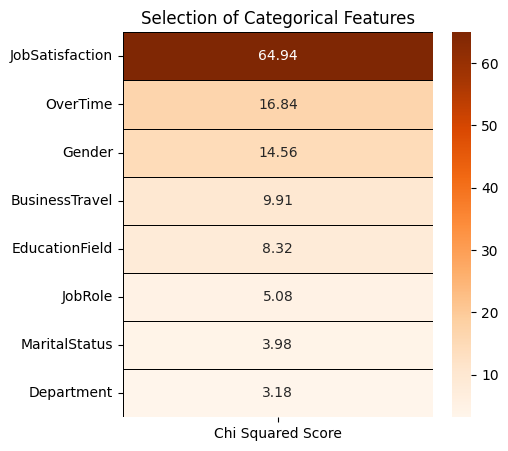

In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = x_train.loc[:, categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'), annot=True, cmap='Oranges', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()


Uji Chi-kuadrat (χ²) adalah metode statistik yang digunakan untuk menilai adanya hubungan yang berarti antara variabel kategorikal. Metode ini terbukti bermanfaat ketika menyelidiki korelasi antara dua variabel kategorikal dalam kumpulan data tertentu.

Nilai Chi-kuadrat yang tinggi menunjukkan varians yang besar antara frekuensi yang diamati dan yang diantisipasi, yang menandakan hubungan yang kuat antara variabel yang dianalisis. Sebaliknya, nilai Chi-kuadrat yang rendah menyiratkan kemiripan yang dekat antara frekuensi yang diamati dan yang diharapkan, yang mengindikasikan hubungan yang minimal atau dapat diabaikan antara variabel-variabel yang diteliti.

features : __`Gender`, `BusinessTravel`, `EducationField`, `OverTime`,`Department`, `MaritalStatus`,`JobRole`__

### 3.8 ANOVA Score Test

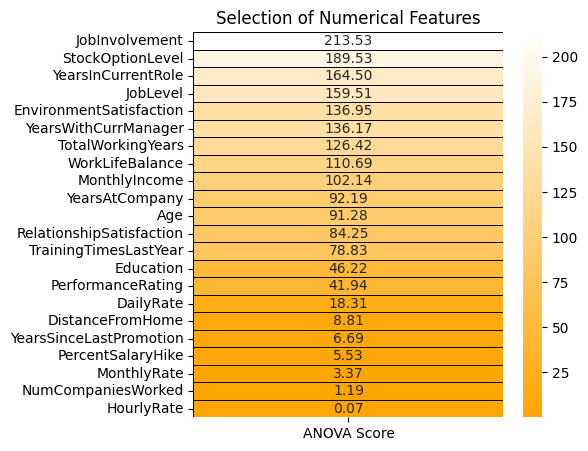

In [110]:
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", ["orange", "white"])

from sklearn.feature_selection import SelectKBest, f_classif

features = x_train.loc[:, numerical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap=custom_cmap, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()


ANOVA F-test adalah alat yang umum digunakan untuk menilai seberapa kuat setiap fitur terkait dengan variabel target dalam pekerjaan klasifikasi. Tes Anova membantu memilih fitur numerik yang menunjukkan perbedaan besar dalam nilai rata-rata di berbagai kategori target. Kemampuan ini menjadikannya metode yang bagus untuk memilih fitur numerik yang relevan untuk tugas klasifikasi.

Ketika Anda menggunakan uji F ANOVA untuk pemilihan fitur, skor ANOVA menunjukkan nilai F untuk setiap fitur. Nilai ini adalah rasio varians antar kelompok terhadap varians dalam kelompok.

Nilai ANOVA yang tinggi berarti fitur tersebut memiliki hubungan yang kuat dengan variabel target, sehingga fitur tersebut sangat berguna untuk memprediksi target.

drop features : __`YearsSinceLastPromotion`, `DailyRate`, `PercentSalaryHike`, `DistanceFromHome`, `NumCompaniesWorked`, `HourlyRate`, `MonthlyRate`__

In [111]:
x_train = x_train.drop(columns = ['Gender', 'BusinessTravel', 'EducationField', 'OverTime', 'Department',
                                  'MaritalStatus', 'JobRole', 'YearsSinceLastPromotion', 'DailyRate',
                                  'PercentSalaryHike', 'DistanceFromHome', 'NumCompaniesWorked', 'HourlyRate',
                                  'MonthlyRate'])

x_test = x_test.drop(columns = ['Gender', 'BusinessTravel', 'EducationField', 'OverTime', 'Department',
                                  'MaritalStatus', 'JobRole', 'YearsSinceLastPromotion', 'DailyRate',
                                  'PercentSalaryHike', 'DistanceFromHome', 'NumCompaniesWorked', 'HourlyRate',
                                  'MonthlyRate'])

In [112]:
x_train.columns

Index(['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

### 3.9 Data Standarisasi dan Normalisasi

In [113]:
mms = MinMaxScaler()  # Normalization
ss = StandardScaler()  # Standardization

columns_to_transform = ['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                        'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'RelationshipSatisfaction',
                        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                        'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

# transformation
for col in columns_to_transform:
    if col in ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']:
        x_train[col] = mms.fit_transform(x_train[[col]])
        x_test[col] = mms.transform(x_test[[col]])
    else:
        x_train[col] = ss.fit_transform(x_train[[col]])
        x_test[col] = ss.transform(x_test[[col]])


In [114]:
x_train.head()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
876,-1.709500,0.229945,0.481524,2.000559,-0.826855,1.538663,0.088228,-0.349028,1.414447,-0.727873,0.050,-0.477393,0.550334,0.05,0.055556,0.117647
1054,1.525279,1.263156,0.481524,0.649658,1.123615,0.641377,0.499921,-0.349028,-0.462523,1.829601,0.725,0.337383,0.550334,0.20,0.388889,0.411765
1868,0.521382,1.263156,-0.440801,0.649658,0.148380,-0.255908,0.170799,-0.349028,-0.462523,-0.727873,0.200,1.152160,-2.123174,0.15,0.111111,0.235294
1656,-0.482515,-1.836477,0.481524,-0.701244,-0.826855,-1.153194,0.136068,-0.349028,-0.462523,-0.727873,0.100,0.337383,-0.786420,0.10,0.166667,0.117647
1442,-0.705603,1.263156,-1.363125,0.649658,-0.826855,1.538663,0.199715,-0.349028,-0.462523,3.108337,0.100,0.337383,1.887089,0.05,0.111111,0.117647


## 3. Modelling: Training and Evaluation

In [115]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))

### XGBoost

Cross Validation Score: 91.91%
ROC_AUC Score: 84.53%


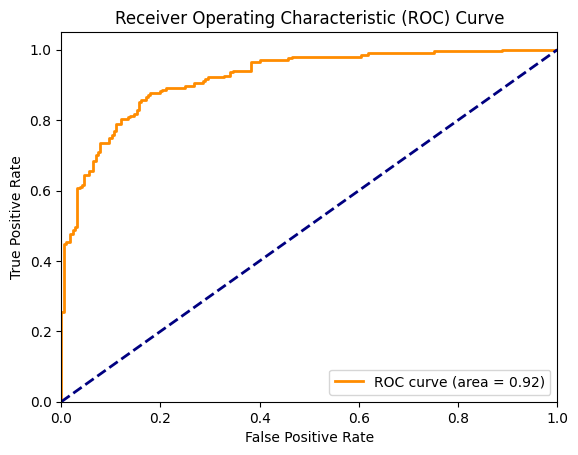

In [116]:
classifier_xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)
model(classifier_xgb, x_train.values, y_train.values, x_test.values, y_test.values)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       217
           1       0.83      0.85      0.84       203

    accuracy                           0.85       420
   macro avg       0.85      0.85      0.85       420
weighted avg       0.85      0.85      0.85       420



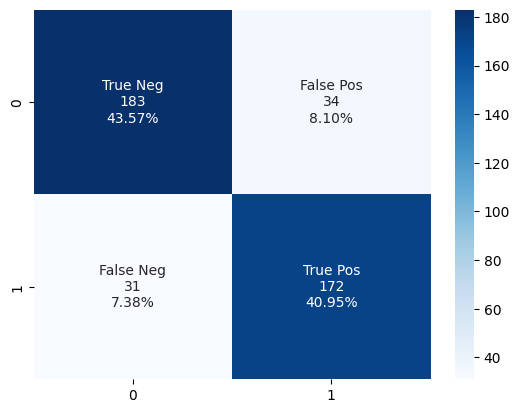

In [117]:
model_evaluation(classifier_xgb, x_test.values, y_test.values)

### Random Forest

Cross Validation Score: 88.36%
ROC_AUC Score: 78.78%


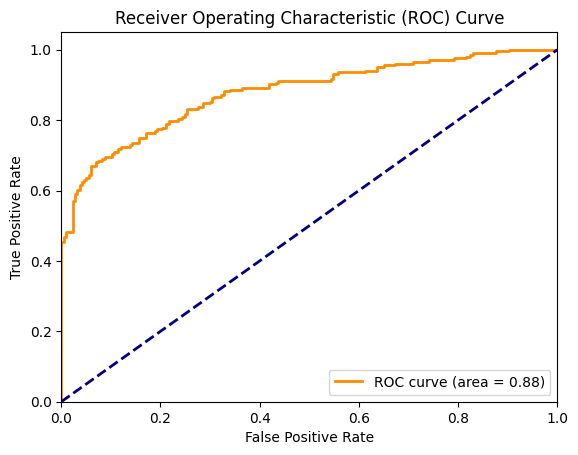

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       217
           1       0.78      0.78      0.78       203

    accuracy                           0.79       420
   macro avg       0.79      0.79      0.79       420
weighted avg       0.79      0.79      0.79       420



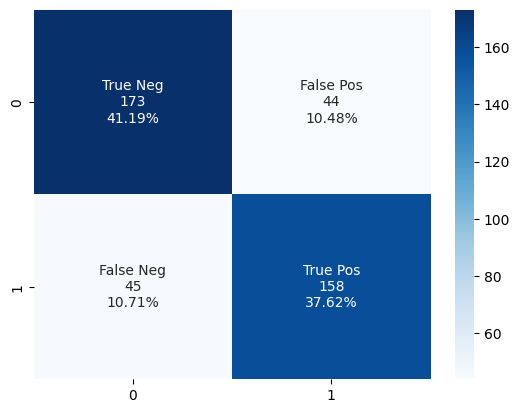

In [71]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_rf,x_test.values,y_test.values)

### Logistic Regression

Cross Validation Score: 87.22%
ROC_AUC Score: 77.15%


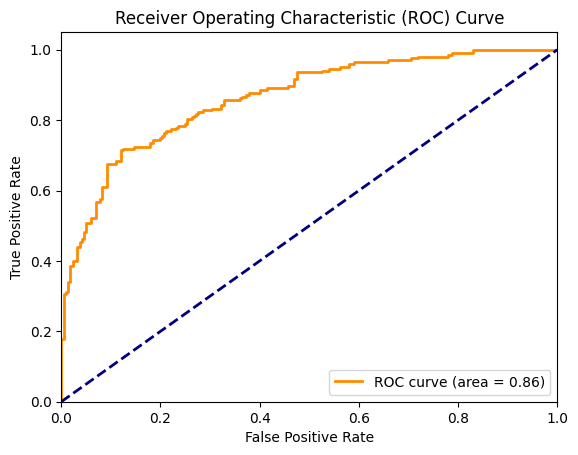

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       217
           1       0.76      0.77      0.77       203

    accuracy                           0.77       420
   macro avg       0.77      0.77      0.77       420
weighted avg       0.77      0.77      0.77       420



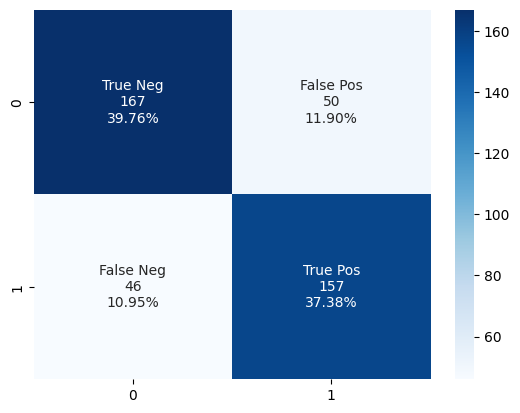

In [72]:
classifier_lr = LogisticRegression()
model(classifier_lr, x_train.values, y_train.values, x_test.values, y_test.values)
model_evaluation(classifier_lr, x_test.values, y_test.values)